In [1]:
# Imports
import pandas as pd
import numpy as np

In [2]:
# Install
!pip install xlrd==1.2.0

In [3]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 338 kB/s eta 0:00:01
Using legacy 'setup.py install' for et-xmlfile, since package 'wheel' is not installed.
    Running setup.py install for et-xmlfile ... done


In [2]:
# Reading Data
data = pd.read_excel('../raw_data/data_siniestros.xlsx', engine='openpyxl')

In [3]:
data.head()

,SINIESTRO,ESTATUS,RAMOID,ENFERMEDAD,TIPO_SIN,TP_PROVEEDOR,ESTADO,SEXO,EDAD,CD_PAIS,MONTO USD,FECHA CONTITUCION,Rango Edad,Hospitalizacion-Ambulatorio
0,1,PAGADO,COLECTIVO,Trastorno Interno De La Rodilla,CARTA AVAL,CLINICA,Distrito Capital,F,69,29,397,2020-12-11,60-69,Ambulatorio
1,2,PAGADO,COLECTIVO,Gonartrosis [Artrosis De La Rodilla],CARTA AVAL,CLINICA,Distrito Capital,M,76,29,457,2021-01-15,Mayor a 70,Ambulatorio
2,3,PAGADO,COLECTIVO,Trastorno Interno De La Rodilla,CARTA AVAL,CLINICA,Distrito Capital,F,69,29,188,2021-01-27,60-69,Ambulatorio
3,4,PAGADO,COLECTIVO,Traumatismo Superficial Del Hombro Y Del Brazo,CARTA AVAL,CLINICA,Distrito Capital,M,45,29,45,2019-11-11,40-49,Ambulatorio
4,5,PAGADO,COLECTIVO,Cervicalalgia/Hernia Discal,CARTA AVAL,CLINICA,Distrito Capital,F,54,29,30,2019-11-25,50-59,Ambulatorio


In [4]:
# Examining data
data.shape
data.describe()
data.dtypes

SINIESTRO                               int64
ESTATUS                                object
RAMOID                                 object
ENFERMEDAD                             object
TIPO_SIN                               object
TP_PROVEEDOR                           object
ESTADO                                 object
SEXO                                   object
EDAD                                    int64
CD_PAIS                                 int64
MONTO USD                               int64
FECHA CONTITUCION              datetime64[ns]
Rango Edad                             object
Hospitalizacion-Ambulatorio            object
dtype: object

In [5]:
# Checking duplicates

len(data) # Check number of rows before removing duplicates
data = data.drop_duplicates() # Remove duplicates
len(data)# Check new number of rows

# There were no duplicates

183619

In [6]:
# Checking null values
data.isnull().sum().sort_values(ascending=False) #NaN count for each column
data.isnull().sum().sort_values(ascending=False)/len(data) #NaN percentage for each column

# ESTADO and TP_PROVEEDOR have 70% of Null so won't be part of the analysis

ESTADO                         0.697923
TP_PROVEEDOR                   0.697733
SINIESTRO                      0.000000
ESTATUS                        0.000000
RAMOID                         0.000000
ENFERMEDAD                     0.000000
TIPO_SIN                       0.000000
SEXO                           0.000000
EDAD                           0.000000
CD_PAIS                        0.000000
MONTO USD                      0.000000
FECHA CONTITUCION              0.000000
Rango Edad                     0.000000
Hospitalizacion-Ambulatorio    0.000000
dtype: float64

In [7]:
# Changing FECHA CONSTITUCION to date time type
#data['FECHA CONTITUCION'] = pd.to_datetime(data['FECHA CONTITUCION'], infer_datetime_format=True)


SINIESTRO                               int64
ESTATUS                                object
RAMOID                                 object
ENFERMEDAD                             object
TIPO_SIN                               object
TP_PROVEEDOR                           object
ESTADO                                 object
SEXO                                   object
EDAD                                    int64
CD_PAIS                                 int64
MONTO USD                              object
FECHA CONTITUCION              datetime64[ns]
Rango Edad                             object
Hospitalizacion-Ambulatorio            object
dtype: object

In [18]:
# Changing MONTO USD to float type
# data['MONTO USD'] = [x.replace('.', '') for x in data['MONTO USD']]
# data['MONTO USD'] = [x.replace(',', '.') for x in data['MONTO USD']]
# data['MONTO USD'] = data['MONTO USD'].astype(float)

In [9]:
data.dtypes

SINIESTRO                               int64
ESTATUS                                object
RAMOID                                 object
ENFERMEDAD                             object
TIPO_SIN                               object
TP_PROVEEDOR                           object
ESTADO                                 object
SEXO                                   object
EDAD                                    int64
CD_PAIS                                 int64
MONTO USD                               int64
FECHA CONTITUCION              datetime64[ns]
Rango Edad                             object
Hospitalizacion-Ambulatorio            object
dtype: object

In [7]:
# Creating a new data frame for FB Prophet

fb_data = pd.DataFrame(data[['FECHA CONTITUCION', 'MONTO USD']]).copy()
fb_data['ds'] = fb_data['FECHA CONTITUCION']
fb_data['y'] = fb_data['MONTO USD']
fb_data = fb_data.drop(columns = ['FECHA CONTITUCION', 'MONTO USD'])
fb_data

,ds,y
0,2020-12-11,397
1,2021-01-15,457
2,2021-01-27,188
3,2019-11-11,45
4,2019-11-25,30
...,...,...
183614,2021-02-04,8425
183615,2021-02-08,2000
183616,2021-02-10,7131
183617,2019-07-22,36665


In [19]:
# Installing FB Prophet
!pip install fbprophet


     |████████████████████████████████| 64 kB 395 kB/s eta 0:00:01
     |████████████████████████████████| 1.9 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 37.4 MB 951 kB/s eta 0:00:01
     |████████████████████████████████| 45 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 598 kB/s eta 0:00:01
     |████████████████████████████████| 74 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 823 kB 355 kB/s eta 0:00:01
Using legacy 'setup.py install' for fbprophet, since package 'wheel' is not installed.
Using legacy 'setup.py install' for holidays, since package 'wheel' is not installed.
Using legacy 'setup.py install' for pymeeus, since package 'wheel' is not installed.
    Running setup.py install for pymeeus ... done
    Running setup.py install for holidays ... done
    Running setup.py install for fbprophet ... done


Importing plotly failed. Interactive plots will not work.


In [8]:
#Importing FB Prophet
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [14]:
split = 0.7
split_index = round(len(fb_data)*split)

train = fb_data.iloc[:split_index]
test = fb_data.iloc[split_index:]



In [15]:
#Fitting model
model = Prophet(seasonality_mode='multiplicative')

model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [16]:
#Predicting
forecast_test = model.predict(test)
forecast_test.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2017-01-01,-318.585716,-128361.962745,116333.717016,-318.585716,-318.585716,-0.408752,-0.408752,-0.408752,0.032702,0.032702,0.032702,-0.441454,-0.441454,-0.441454,0.0,0.0,0.0,-188.363189
1,2017-01-02,-141.232479,-125920.851413,125707.437290,-141.232479,-141.232479,-0.627511,-0.627511,-0.627511,-0.183081,-0.183081,-0.183081,-0.444430,-0.444430,-0.444430,0.0,0.0,0.0,-52.607571
2,2017-01-02,-141.232479,-121362.679158,127472.666358,-141.232479,-141.232479,-0.627511,-0.627511,-0.627511,-0.183081,-0.183081,-0.183081,-0.444430,-0.444430,-0.444430,0.0,0.0,0.0,-52.607571
3,2017-01-02,-141.232479,-137894.963315,126686.703426,-141.232479,-141.232479,-0.627511,-0.627511,-0.627511,-0.183081,-0.183081,-0.183081,-0.444430,-0.444430,-0.444430,0.0,0.0,0.0,-52.607571
4,2017-01-02,-141.232479,-127859.719081,122676.181652,-141.232479,-141.232479,-0.627511,-0.627511,-0.627511,-0.183081,-0.183081,-0.183081,-0.444430,-0.444430,-0.444430,0.0,0.0,0.0,-52.607571


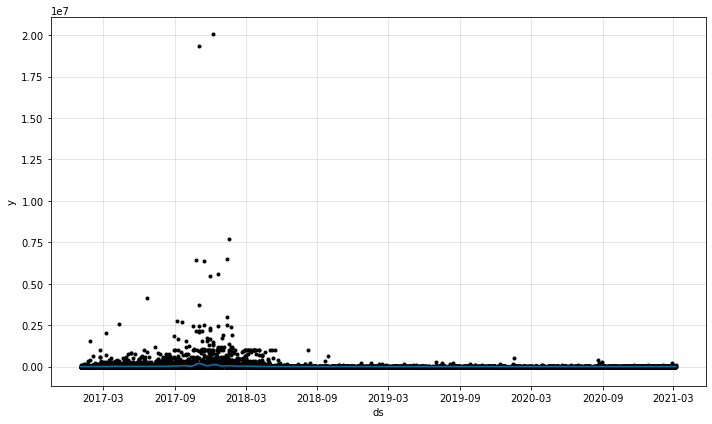

In [17]:
# Build-in plot
model.plot(forecast_test);

In [18]:
# Predict the next 30 datapoints
future = model.make_future_dataframe(periods=30, freq='MS')
forecast_future = model.predict(future)
forecast_future.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2017-01-02,-141.232479,-135515.980324,122188.814149,-141.232479,-141.232479,-0.627511,-0.627511,-0.627511,-0.183081,-0.183081,-0.183081,-0.444430,-0.444430,-0.444430,0.0,0.0,0.0,-52.607571
1,2017-01-03,36.120758,-134169.505160,136511.138729,36.120758,36.120758,-0.534958,-0.534958,-0.534958,-0.098725,-0.098725,-0.098725,-0.436233,-0.436233,-0.436233,0.0,0.0,0.0,16.797665
2,2017-01-04,213.473994,-147617.962191,123777.335249,213.473994,213.473994,-0.503997,-0.503997,-0.503997,-0.086478,-0.086478,-0.086478,-0.417519,-0.417519,-0.417519,0.0,0.0,0.0,105.883748
3,2017-01-05,390.827231,-123466.411466,122827.121799,390.827231,390.827231,-0.127598,-0.127598,-0.127598,0.261605,0.261605,0.261605,-0.389203,-0.389203,-0.389203,0.0,0.0,0.0,340.958546
4,2017-01-06,568.180468,-125006.221353,127795.662995,568.180468,568.180468,-0.281698,-0.281698,-0.281698,0.070732,0.070732,0.070732,-0.352430,-0.352430,-0.352430,0.0,0.0,0.0,408.124977


In [19]:
# A REVISAR

from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

initial = f'{5 * 365} days' # needs to be in exactly this format
period = f'{5 * 365} days'
horizon = '365 days'
df_cv = cross_validation(model, initial=initial, period=period, horizon=horizon)
performance_metrics(df_cv)

NameError: name 'cross_validation' is not defined